In [4]:
import gensim
from gensim.models import Word2Vec, KeyedVectors


In [5]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')

In [6]:
import pandas as pd
messages=pd.read_csv('Datasets/smsspamcollection.txt',
                    sep='\t',names=["label","message"])

In [8]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [9]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^A-Za-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word,pos='v') for word in review]
    review=' '.join(review)
    corpus.append(review)

In [102]:
len(corpus)

5572

In [123]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, messages['message']) if i<1] # check which row removed from 5572 --> 5569

[[0, '', '645'], [0, '', ':) '], [0, '', ':-) :-)']]

In [124]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [125]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [126]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'get',
  'amore',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'live',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'be',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'be',
  'not',
  'like',
  'to',
  'speak',


#### Train Word2Vec from Scratch

In [127]:
model=gensim.models.Word2Vec(words)

In [128]:
model.wv.index_to_key # all the vocabulary

['be',
 'to',
 'you',
 'the',
 'and',
 'in',
 'have',
 'me',
 'my',
 'it',
 'do',
 'for',
 'get',
 'call',
 'your',
 'of',
 'that',
 'go',
 'on',
 'now',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'at',
 'will',
 'ur',
 'if',
 'with',
 'no',
 'just',
 'this',
 'come',
 'gt',
 'lt',
 'up',
 'how',
 'when',
 'ok',
 'what',
 'know',
 'free',
 'from',
 'send',
 'all',
 'out',
 'll',
 'like',
 'time',
 'love',
 'want',
 'good',
 'day',
 'then',
 'there',
 'he',
 'say',
 'its',
 'only',
 'think',
 'tell',
 'take',
 'text',
 'need',
 'win',
 'see',
 'txt',
 'as',
 'make',
 'one',
 'by',
 'stop',
 'don',
 'home',
 'she',
 'about',
 'reply',
 'lor',
 'today',
 'sorry',
 'still',
 'back',
 'da',
 'dont',
 'our',
 'mobile',
 'phone',
 'please',
 'hi',
 'meet',
 'new',
 'work',
 'they',
 'miss',
 'later',
 'any',
 'pls',
 'her',
 'ask',
 'give',
 'some',
 'week',
 'dear',
 'message',
 'here',
 'who',
 'wait',
 'well',
 'leave',
 'where',
 're',
 'night',
 'try',
 'much',
 'great',
 'an',
 'clai

In [129]:
model.corpus_count

5569

In [130]:
model.epochs

5

In [131]:
import numpy as np
def avgWord2Vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [132]:
from tqdm import tqdm

In [133]:
#apply for the entire sentences
import numpy as np
X=[]  
for i in tqdm(range(len(words))):
    X.append(avgWord2Vec(words[i]))


  7%|█████▋                                                                       | 412/5569 [00:00<00:01, 4108.39it/s]C:\Users\91821\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\91821\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|████████████████████████████████████████████████████████████████████████████| 5569/5569 [00:01<00:00, 3889.29it/s]


In [134]:
len(X)

5569

In [135]:
## Dependent Features
Y = messages[list(map(lambda x: len(x)>0 ,corpus))]
Y=pd.get_dummies(Y['label']).iloc[:,0].values

In [136]:
Y.shape

(5569,)

In [137]:
## Independent Features

df=pd.DataFrame()
for i in range(0,len(X)):
    df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)

C:\Users\91821\AppData\Local\Temp\ipykernel_27736\3068116062.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(pd.DataFrame(X[i].reshape(1,-1)),ignore_index=True)


In [138]:
df.shape

(5569, 100)

In [139]:
df['Output']=Y

In [140]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.197163,0.232802,0.005384,-0.041085,0.156405,-0.334457,0.159097,0.499457,-0.285932,-0.228581,...,0.176014,0.090807,0.102458,0.503505,0.251114,0.136449,-0.203209,0.083499,-0.141225,1
1,-0.206818,0.236023,0.006830,-0.039655,0.159570,-0.342970,0.144405,0.487653,-0.279026,-0.217963,...,0.172583,0.087914,0.085877,0.489196,0.245882,0.132223,-0.207205,0.084008,-0.141026,1
2,-0.242290,0.243944,-0.015985,-0.054436,0.195088,-0.367395,0.149162,0.550512,-0.307838,-0.261568,...,0.175036,0.082462,0.137000,0.547811,0.254590,0.151019,-0.267094,0.079931,-0.124178,0
3,-0.270083,0.328919,0.017362,-0.043875,0.222762,-0.468511,0.216847,0.671446,-0.402618,-0.308026,...,0.237386,0.124853,0.114724,0.683217,0.344071,0.182934,-0.265165,0.116715,-0.202215,1
4,-0.226854,0.266688,0.009929,-0.050542,0.192100,-0.386460,0.180259,0.566175,-0.334658,-0.261982,...,0.198356,0.105909,0.101994,0.572178,0.288256,0.159360,-0.231258,0.097446,-0.163854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,-0.266546,0.289575,-0.007612,-0.061741,0.222046,-0.419888,0.185951,0.647112,-0.367744,-0.300341,...,0.216211,0.117903,0.159866,0.639484,0.307776,0.180338,-0.295942,0.099055,-0.152176,0
5565,-0.264478,0.291503,0.001183,-0.052762,0.218109,-0.423826,0.191626,0.616474,-0.357939,-0.284865,...,0.203797,0.112396,0.116964,0.619289,0.304607,0.172870,-0.265267,0.097365,-0.165300,1
5566,-0.251582,0.310579,0.006774,-0.056530,0.214083,-0.436978,0.223836,0.675649,-0.397340,-0.306642,...,0.244335,0.134148,0.138178,0.675351,0.334921,0.182486,-0.258249,0.108191,-0.193831,1
5567,-0.239929,0.283579,0.000949,-0.051603,0.199417,-0.409277,0.195687,0.615452,-0.358527,-0.286822,...,0.215656,0.112048,0.127627,0.620176,0.303377,0.169257,-0.249941,0.100624,-0.172718,1


In [141]:
df.dropna(inplace=True)

In [142]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [154]:
## Independent Feature
X=df.drop(['Output'],axis=1)

In [155]:
## Dependent Features
Y=df['Output']

### Train Test Split

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=15)

In [157]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
4062,-0.260675,0.299695,0.015959,-0.051560,0.243701,-0.428749,0.227168,0.678669,-0.414038,-0.308119,...,0.416471,0.243975,0.146003,0.111217,0.666595,0.351056,0.180796,-0.277452,0.119001,-0.187886
4505,-0.257132,0.298469,0.008302,-0.061232,0.242902,-0.431795,0.221322,0.663910,-0.415644,-0.302749,...,0.415724,0.242684,0.137399,0.107747,0.660908,0.338518,0.184144,-0.265732,0.118238,-0.189029
629,-0.279256,0.295395,-0.016782,-0.061305,0.220427,-0.436182,0.188236,0.653377,-0.366361,-0.305173,...,0.415206,0.214380,0.102968,0.154182,0.655788,0.305988,0.180208,-0.301363,0.101688,-0.157823
5532,-0.229705,0.265901,0.005518,-0.046438,0.195026,-0.383464,0.182456,0.573181,-0.342081,-0.263883,...,0.358636,0.202555,0.111191,0.111501,0.578345,0.287853,0.158503,-0.235276,0.094242,-0.160746
1532,-0.257372,0.297069,0.002567,-0.061186,0.231992,-0.432546,0.205608,0.657207,-0.388315,-0.303281,...,0.411747,0.230371,0.127767,0.125883,0.653522,0.321009,0.182916,-0.271689,0.105693,-0.179858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3276,-0.232320,0.262542,0.001792,-0.051209,0.203446,-0.382638,0.180569,0.579556,-0.336996,-0.274774,...,0.367849,0.201692,0.111688,0.120117,0.578908,0.284611,0.159119,-0.248097,0.092972,-0.147586
2719,-0.253601,0.306138,0.002526,-0.061156,0.214697,-0.440835,0.210943,0.646102,-0.379790,-0.295897,...,0.410997,0.228431,0.120003,0.120222,0.654251,0.327628,0.178540,-0.260654,0.110925,-0.185185
2207,-0.229841,0.274116,0.000657,-0.045891,0.194490,-0.396495,0.187724,0.593603,-0.345642,-0.272040,...,0.363304,0.211454,0.112032,0.116735,0.594260,0.292629,0.163266,-0.235799,0.100251,-0.168878
2697,-0.236301,0.272562,-0.001826,-0.055123,0.216438,-0.392640,0.188134,0.597443,-0.355122,-0.277431,...,0.375385,0.213431,0.108569,0.118434,0.600475,0.290115,0.165351,-0.249855,0.094015,-0.164498


In [158]:
Y_train

4062    1
4505    1
629     0
5532    1
1532    1
       ..
3276    1
2719    1
2207    1
2697    1
3835    1
Name: Output, Length: 4445, dtype: uint8

In [170]:
## ML ALGORITHM - Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [160]:
# Hyperparameter Tuning

randomForest_param={
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "auto", 8],
    "min_samples_split":[2,8,15,20],
    "n_estimators":[100,200,500,1000]
}

In [161]:
randomcv_models=[
                    ("Random Forest",RandomForestClassifier(),randomForest_param),
                ]
randomcv_models

[('Random Forest',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [166]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in randomcv_models:
    
    random=RandomizedSearchCV(estimator=model,
                             param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1
                             )
    random.fit(X_train,Y_train)
    model_param[name]=random.best_params_
        
for model_name in model_param:
    print(f"------------------------Best Params for {model_name}------------------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
------------------------Best Params for Random Forest------------------------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [177]:
models={
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=8,max_depth=8)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    # Train Model
    model.fit(X_train,Y_train)   
    
    # Make Predicitions
    Y_train_pred=model.predict(X_train)
    Y_test_pred=model.predict(X_test)
    
    #Training dataset Performance
    trainModel_Accuracy=accuracy_score(Y_train,Y_train_pred)
    trainModel_Precision=precision_score(Y_train,Y_train_pred)
    trainModel_Recall=recall_score(Y_train,Y_train_pred)
    trainModel_F1_Score=f1_score(Y_train,Y_train_pred,average='weighted')
    trainModel_ROC_AUC_Score=roc_auc_score(Y_train,Y_train_pred)
    
    #Test dataset Performance
    testModel_Accuracy=accuracy_score(Y_test,Y_test_pred)
    testModel_Precision=precision_score(Y_test,Y_test_pred)
    testModel_Recall=recall_score(Y_test,Y_test_pred)
    testModel_F1_Score=f1_score(Y_test,Y_test_pred,average='weighted')
    testModel_ROC_AUC_Score=roc_auc_score(Y_test,Y_test_pred)
    
    ## Print all Metrics
    print("*"*35)
    print("MODEL- ",list(models.keys())[i])
    
    print("*"*35)
    
    print('Training dataset Model Performance')
    print("- Accuracy: {:.4f}".format(trainModel_Accuracy))
    print('- Precision: {:.4f}'.format(trainModel_Precision))
    print('- Recall: {:.4f}'.format(trainModel_Recall))
    print('- F1 score: {:.4f}'.format(trainModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(trainModel_ROC_AUC_Score))
    
    print('-'*35)
    
    print('Test dataset Model Performance')
    print("- Accuracy: {:.4f}".format(testModel_Accuracy))
    print('- Precision: {:.4f}'.format(testModel_Precision))
    print('- Recall: {:.4f}'.format(testModel_Recall))
    print('- F1 score: {:.4f}'.format(testModel_F1_Score))
    print('- Roc Auc Score: {:.4f}'.format(testModel_ROC_AUC_Score))
    
    print('='*35)

***********************************
MODEL-  Random Forest
***********************************
Training dataset Model Performance
- Accuracy: 0.9881
- Precision: 0.9925
- Recall: 0.9938
- F1 score: 0.9881
- Roc Auc Score: 0.9721
-----------------------------------
Test dataset Model Performance
- Accuracy: 0.9694
- Precision: 0.9732
- Recall: 0.9916
- F1 score: 0.9687
- Roc Auc Score: 0.9140


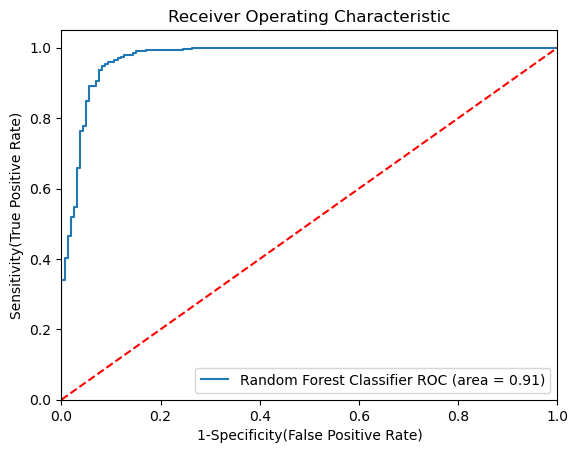

In [181]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=8,max_depth=8),
    'auc':  0.9140
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, Y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 